In [1]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate

# *Figurative Scenario*

### **Identify and Explain Issue**

In [4]:
def identify_explain(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. Take a neurodiversity-informed stance. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [5]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [6]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = identify_explain(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))

In [7]:
with open('../figurative_analysis_data/identify_explain_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)

In [8]:
with open('../figurative_analysis_data/identify_explain_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]

[{'fault': 'Speaker 2',
  'explanation': "Speaker 2's response does not address the concern expressed by Speaker 1. Instead, it introduces humor that might not be well-received, especially if Speaker 1 is feeling genuinely frustrated. While humor can sometimes diffuse tension, it can also come across as dismissive or irrelevant if not well-timed. Speaker 2 could benefit from improving their attentiveness to the emotional state and explicit concerns of their conversation partner, particularly in a situation where the other person is expressing frustration or impatience."},
 {'fault': 'neither',
  'explanation': "Both speakers are communicating effectively, and their exchange shows a natural flow of conversation. Speaker 1 uses an idiomatic expression to describe someone's intelligence and role, while Speaker 2's response, although it could be interpreted metaphorically or literally, demonstrates curiosity and could provoke further discussion. From a neurodiversity-informed stance, inter

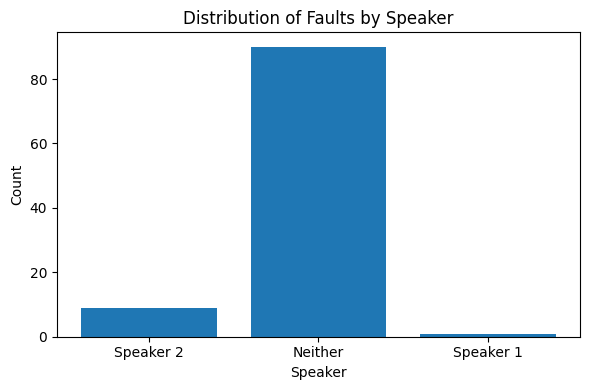

In [10]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [2]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? Take a neurodiversity-informed stance. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [3]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [4]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))

In [5]:
with open('../figurative_analysis_data/provide_feedback_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)

In [6]:
with open('../figurative_analysis_data/provide_feedback_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]

[{'feedback': "Speaker 2's response may come across as dismissive or sarcastic to Speaker 1, who is expressing frustration. It's important to acknowledge Speaker 1's feelings genuinely. A more empathetic response could improve the communication. For instance, saying something like, 'I understand that the delays are frustrating. Let's see what we can do to address them,' would validate Speaker 1's emotions and foster a more constructive dialogue."},
 {'feedback': "Speaker 2's response appears to be a rhetorical question, which can sometimes be interpreted as dismissive or sarcastic. To foster more inclusive and respectful communication, especially considering neurodiversity, it might be more effective to ask for clarification or acknowledge Speaker 1's comment directly. For example, 'What do you mean by that?' or 'That's interesting, can you tell me more about how they contribute?' This approach invites more detailed discussion and values different perspectives."},
 {'feedback': "Speake

### **Autistic vs Non-autistic Chances**


In [18]:
def autistic_chances(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nIn the dialogue above, what are the chances that the statement labeled "Speaker 2" could be made by an autistic person as opposed to an non-autistic person? Take a neurodiversity-informed stance. Choose exactly one option: "Low", "Medium", or "High". Explain your answer. You must output a dictionary formatted exactly as follows with no extra tags, fenced blocks or text: {"chance":"low, medium, or high", "explanation":"Explanation for your answer."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [19]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    


In [20]:
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [21]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = autistic_chances(dialogue)['response']
    try:
        return ast.literal_eval(response)
    except:
        print(response)
        print(i, "\n\n", dialogue, "\n\n")
        return ast.literal_eval("{'chance':'error', 'explanation':'error'}")
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [22]:
results[0:2]

[{'chance': 'high',
  'explanation': "The statement by Speaker 2 could be reflective of a literal interpretation of the phrase 'patience is wearing thin,' which is a common characteristic in autistic communication styles. Autistic individuals often interpret language more literally and may not immediately recognize or respond to idiomatic expressions in the expected neurotypical manner."},
 {'chance': 'medium',
  'explanation': 'The statement by Speaker 2 shows a literal interpretation and curiosity about how one person could have all the intelligence, which can be a characteristic of autistic communication styles. However, this kind of response can also be made by non-autistic individuals who are critical or inquisitive by nature. Therefore, the chances are medium.'}]

In [23]:
with open('../figurative_analysis_data/autistic_chances_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [24]:
def non_autistic_chances(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nIn the dialogue above, what are the chances that the statement labeled "Speaker 2" could be made by a non-autistic person as opposed to an autistic person? Take a neurodiversity-informed stance. Choose exactly one option: "Low", "Medium", or "High". Explain your answer. You must output a dictionary formatted exactly as follows with no extra tags, fenced blocks or text: {"chance":"low, medium, or high", "explanation":"Explanation for your answer."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [25]:
with open('../figurative_generated_data/figurative.json') as f:
    figurative_statements_generated = json.load(f)
    


In [26]:
figurative_statements_generated[0:2]

[{'Speaker 1': 'My patience is wearing thin with these constant delays.',
  'Speaker 2': 'Should we get you a new coat then?'},
 {'Speaker 1': "He's the brain behind the operation.",
  'Speaker 2': 'How can one person have all the brains?'}]

In [27]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in figurative_statements_generated[i].items()])
    response = non_autistic_chances(dialogue)['response']
    try:
        return ast.literal_eval(response)
    except:
        print(response)
        print(i, "\n\n", dialogue, "\n\n")
        return ast.literal_eval("{'chance':'error', 'explanation':'error'}")
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [28]:
results[0:2]

[{'chance': 'medium',
  'explanation': "While it's a playful and somewhat unexpected response, it is difficult to definitively attribute this type of comment to either neurotypical or autistic individuals. People from both groups can exhibit a range of communication styles, including humor and non-literal responses."},
 {'chance': 'medium',
  'explanation': "The statement by Speaker 2 could plausibly be made by both autistic and non-autistic individuals. Asking how one person can have all the brains could be an expression of literal thinking, which is sometimes associated with autism. However, it could also be a rhetorical or jesting question asked by a non-autistic person to emphasize surprise or disbelief about someone's abilities. Therefore, it is not strongly indicative of either neurotype."}]

In [29]:
with open('../figurative_analysis_data/non_autistic_chances_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [30]:
with open('../figurative_analysis_data/autistic_chances_ctx_neuro.json') as f:
    autistic_results_loaded = json.load(f)

autistic_results_loaded[0:2]


[{'chance': 'high',
  'explanation': "The statement by Speaker 2 could be reflective of a literal interpretation of the phrase 'patience is wearing thin,' which is a common characteristic in autistic communication styles. Autistic individuals often interpret language more literally and may not immediately recognize or respond to idiomatic expressions in the expected neurotypical manner."},
 {'chance': 'medium',
  'explanation': 'The statement by Speaker 2 shows a literal interpretation and curiosity about how one person could have all the intelligence, which can be a characteristic of autistic communication styles. However, this kind of response can also be made by non-autistic individuals who are critical or inquisitive by nature. Therefore, the chances are medium.'}]

In [31]:
with open('../figurative_analysis_data/non_autistic_chances_ctx_neuro.json') as f:
    non_autistic_results_loaded = json.load(f)

non_autistic_results_loaded[0:2]


[{'chance': 'medium',
  'explanation': "While it's a playful and somewhat unexpected response, it is difficult to definitively attribute this type of comment to either neurotypical or autistic individuals. People from both groups can exhibit a range of communication styles, including humor and non-literal responses."},
 {'chance': 'medium',
  'explanation': "The statement by Speaker 2 could plausibly be made by both autistic and non-autistic individuals. Asking how one person can have all the brains could be an expression of literal thinking, which is sometimes associated with autism. However, it could also be a rhetorical or jesting question asked by a non-autistic person to emphasize surprise or disbelief about someone's abilities. Therefore, it is not strongly indicative of either neurotype."}]

Total pairs considered: 100
Valid, aligned pairs kept: 100
Dropped pairs: 0


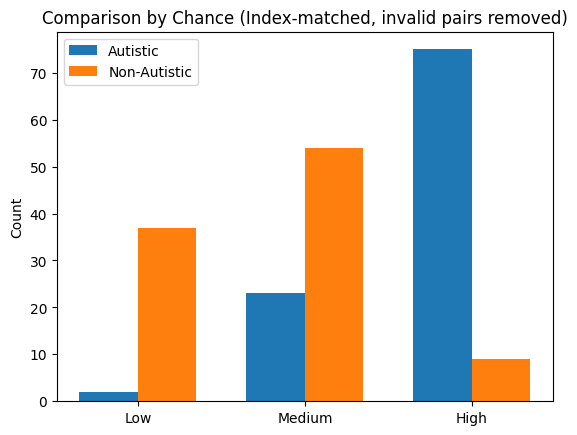

In [32]:
valid_values = {"low", "medium", "high"}

def get_chance(d):
    """Return normalized 'chance' string or None if missing/invalid."""
    v = d.get("chance", None)
    if not isinstance(v, str):
        return None
    v = v.strip().lower()
    return v if v in valid_values else None

# Index-matched filtering: keep only pairs where BOTH sides are valid
paired_valid = []
n_pairs = min(len(autistic_results_loaded), len(non_autistic_results_loaded))
for a_dict, b_dict in zip(autistic_results_loaded[:n_pairs], non_autistic_results_loaded[:n_pairs]):
    a = get_chance(a_dict)
    b = get_chance(b_dict)
    if a is not None and b is not None:
        paired_valid.append((a, b))

# Split back into two aligned lists
autistic_clean = [a for a, _ in paired_valid]
non_autistic_clean = [b for _, b in paired_valid]

print("Total pairs considered:", n_pairs)
print("Valid, aligned pairs kept:", len(paired_valid))
print("Dropped pairs:", n_pairs - len(paired_valid))

# Counts
categories = ["low", "medium", "high"]
autistic_counts = Counter(autistic_clean)
non_autistic_counts = Counter(non_autistic_clean)

autistic_values = [autistic_counts.get(cat, 0) for cat in categories]
non_autistic_values = [non_autistic_counts.get(cat, 0) for cat in categories]

# Plot (grouped bars)
x = range(len(categories))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], autistic_values, width=bar_width, label="Autistic")
plt.bar([i + bar_width/2 for i in x], non_autistic_values, width=bar_width, label="Non-Autistic")

plt.xticks(x, [c.capitalize() for c in categories])
plt.ylabel("Count")
plt.title("Comparison by Chance (Index-matched, invalid pairs removed)")
plt.legend()
plt.show()